Load the data from provided `students.json` file, create 2D ndarray containing students' grades and calculate every student average grade using a singe call to numpy.average

In [1]:
import numpy as np
import json

In [2]:
with open("students.json") as file:
    data = json.load(file)

# [student['grades'] for student in data]
#OR
#x = []
#for student in data:
#    x.append(student['grades'])

# g_list = []
# for g in data[0]['grades'].split():
#     g_list.append(int(g))
# g_list
# OR
# list(map(int, data[0]['grades'].split()))

# [list(map(int, student['grades'].split())) for student in data]
x = []
for student in data:
    grades = []
    for g in student['grades'].split():
        grades.append(int(g))
    x.append(grades)

    
array = np.array(x)
print(array.shape)
print(array)
np.average(array, axis=1)

(13, 10)
[[5 4 6 3 6 4 3 3 3 3]
 [4 2 4 4 3 3 1 3 1 3]
 [4 4 4 4 3 3 4 4 3 3]
 [4 4 3 3 3 4 4 3 3 4]
 [1 2 1 1 3 2 4 3 1 3]
 [1 4 3 4 2 4 3 3 2 4]
 [3 4 3 1 1 2 3 4 4 3]
 [3 1 1 1 3 3 3 2 3 3]
 [4 4 4 1 3 3 3 4 1 2]
 [3 6 3 5 3 5 4 6 3 4]
 [3 5 4 3 5 4 5 4 3 5]
 [5 4 3 5 5 4 4 5 4 5]
 [5 3 4 5 4 5 4 5 3 6]]


array([4. , 2.8, 3.6, 3.5, 2.1, 3. , 2.8, 2.3, 2.9, 4.2, 4.1, 4.4, 4.4])

In [3]:
# !pip install matplotlib


In [4]:
import matplotlib.pyplot as plt

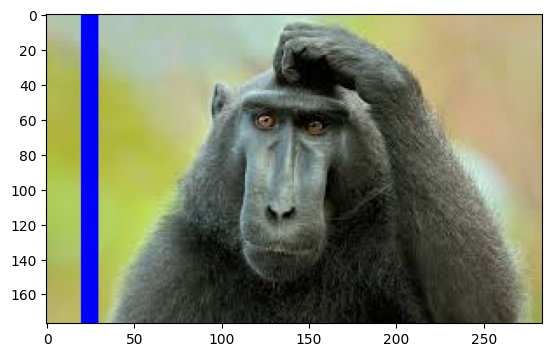

In [5]:
image = plt.imread("monkey.png")

image[:, 20:30] = [0, 0, 1, 1]

plt.imshow(image)

### Using slicing, select (manually) only the monkey's face and print it using plt.imshow

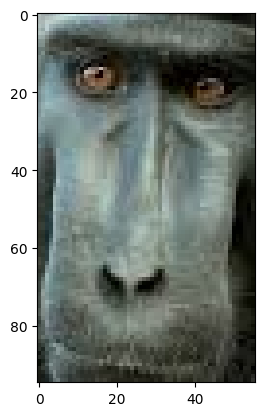

In [6]:
face = image[45:140, 110:166]
plt.imshow(face)

### Select only the red channel from the image. (set green and blue to 0)

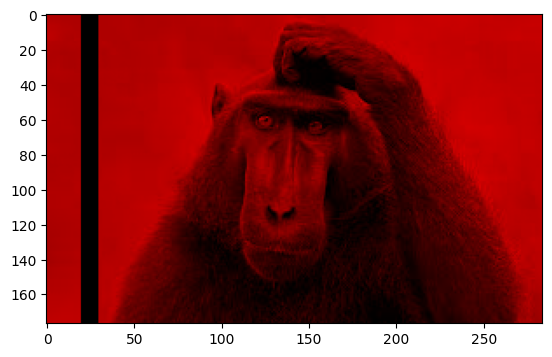

In [7]:
# image[:, :, 1:3] = 0  # we are selecting only G and B channels
image *= [1, 0, 0, 1]
plt.imshow(image)

### Produce a negative of the image ([R G B] -> [1-R 1-G 1-B])

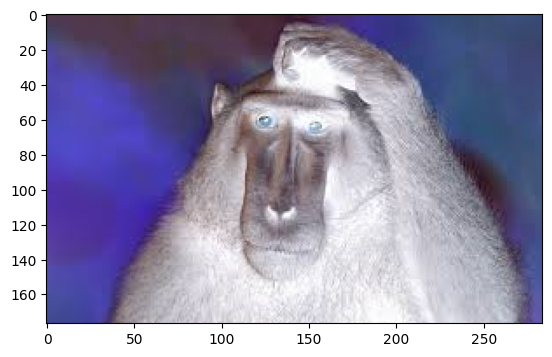

In [8]:
# [0.8, 0.4, 0.2] -> [0.2, 0.6, 0.8]
image = plt.imread("monkey.png")  # reloading the image (so it won't be red ;))
result = 1 - image[:, :, :-1]  # we are removing the alpha channel [R G B]
# result[:, :, 3] = 1  # without removing the alpha channel we need to set it back to 1.

plt.imshow(result)


# [1, 1, 1, 1] - [R G B A] = [1-R, 1-G, 1-B, 1-A]
# [1-R, 1-G, 1-B, 1]

### Convert provided image to grayscale.
A pixel is gray when R == G == B (e.g (0.5, 0.5, 0.5)).

To convert an (R,G,B) pixel to grayscale replace it with (A, A, A), where A = (R + G + B) / 3

hint: `numpy.sum()`

In [9]:
image = plt.imread("monkey.png")[:, :, :3]  # removing alpha channel
image.shape

(177, 284, 3)

In [10]:
np.sum(image, axis=2).shape

(177, 284)

In [11]:
d = np.average(image, axis=2, keepdims=True)

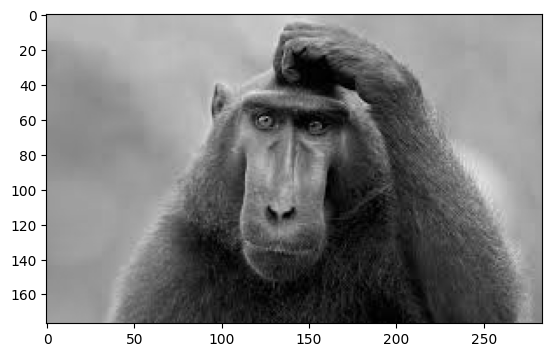

In [12]:
# (177, 284, 1)
# (  1,   1, 3)
# (177, 284, 3)

grayscale = d * np.ones(3) 
plt.imshow(grayscale)
# a = np.arange(5)
# a.reshape((5, 1)) * np.ones(3)


# Plotting

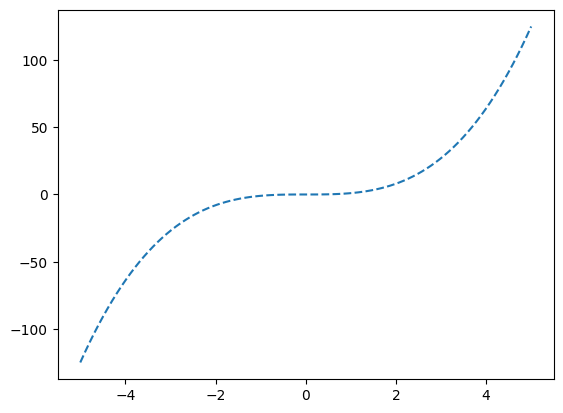

In [13]:
# x = np.arange(-5, 5, 2)  # arange(start, stop, step)
x = np.linspace(-5, 5, 100)  # linspace(start, stop, no_of_values)
y = x ** 3
plt.plot(x, y, '--')

### 1. Draw a plot for sine (np.sin) function for $x \in [0, 2\pi]$ using red line with dash-dot style

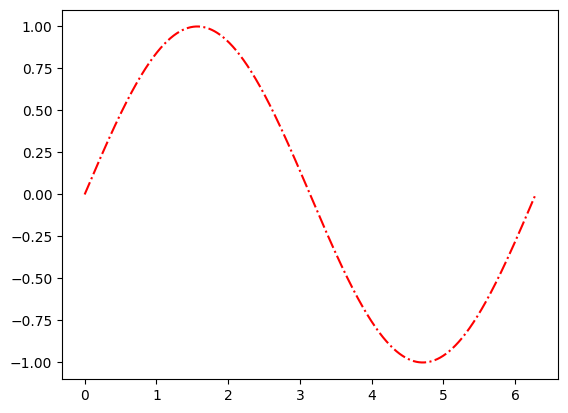

In [14]:
x = np.linspace(0, np.pi * 2, 10000)
y = np.sin(x)
plt.plot(x, y, 'r-.')

### 2. Draw a "staircase" function

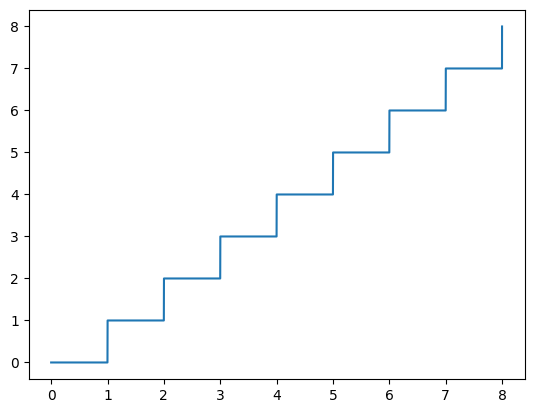

In [15]:
x = np.linspace(0, 8, 10000)
y = np.floor(x)
plt.plot(x, y)

## Labels & multiple plots

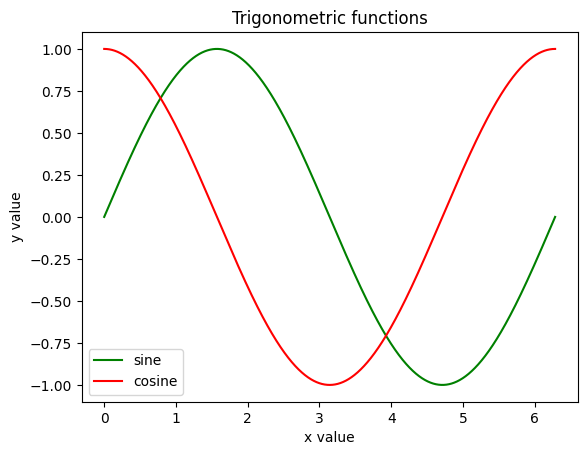

In [16]:
x = np.linspace(0, 2 * np.pi, 10000)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'g', label="sine")
plt.plot(x, y2, 'r', label="cosine")
plt.title("Trigonometric functions")
plt.xlabel("x value")
plt.ylabel("y value")
plt.legend()  # show legend box with labels set in plot() calls
plt.show()

### 3. Gold, gold, gold
- Download the last 30 quotations of the gold price from [here](http://api.nbp.pl/api/cenyzlota/last/30/?format=json) and draw a plot with dates on X axis and price on Y axis.
- Draw the cumulative average of the data on the same plot (hint: `np.cumsum`)

In [18]:
from urllib.request import urlopen
import json
from datetime import date

with urlopen("http://api.nbp.pl/api/cenyzlota/last/30/?format=json") as h:
    prices = json.load(h)

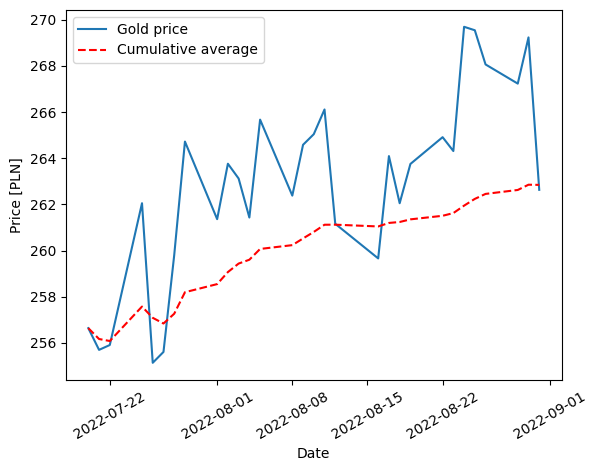

In [42]:
x = [date.fromisoformat(p['data']) for p in prices]
y = [p['cena'] for p in prices]
cumulative_sum = np.cumsum(y)
y2 = cumulative_sum / np.arange(1, cumulative_sum.size + 1)
plt.plot(x, y, label="Gold price")
plt.plot(x, y2, 'r--', label="Cumulative average")
plt.xlabel("Date")
plt.ylabel("Price [PLN]")
plt.xticks(rotation=30)
plt.legend()
plt.show()


### Draw a bar chart ([link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)) visualising the result counts of 100 2-dice rolls.
1. Generate the data (np.random)
2. Calculate the occurences of each result
3. Draw the chart

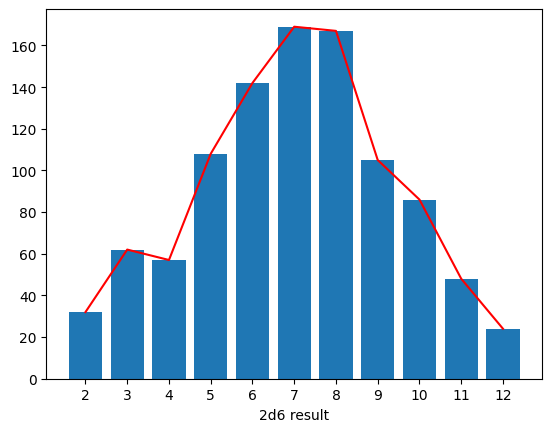

In [65]:
rolls = np.random.randint(1, 7, size=1000) + np.random.randint(1, 7, size=1000)
x, y = np.unique(rolls, return_counts=True)  # we split the resulting tuple to 2 variables

plt.bar(x, y)
plt.plot(x, y, 'r')
plt.xlabel("2d6 result")
plt.xticks(x)
plt.show()

(array([ 32.,  62.,  57., 108., 142., 169., 167., 105.,  86.,  48.,  24.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

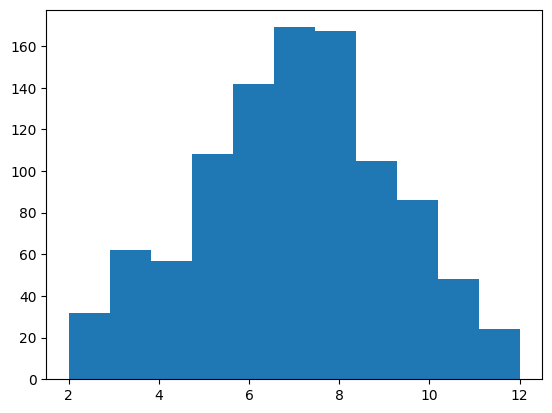

In [69]:
plt.hist(rolls, bins=11)

There are 256 different shades of gray possible to display.

### Draw a histogram showing the ditribution of gray color in the monkey picture
- convert the image from 0-1 format to 0-255 format (`int(value * 255)`)
- draw a bar chart for this data
- draw a histogram for this data with smaller number of bins

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.        , 0.00355392, 0.00710784, 0.01066176, 0.01421569,
        0.01776961, 0.02132353, 0.02487745, 0.02843137, 0.03198529,
        0.03553922, 0.03909314, 0.04264706, 0.04620098, 0.0497549 ,
        0.05330882, 0.05686275, 0.06041667, 0.06397059, 0.06752451,
        0.07107843, 0.07463235, 0.07818627, 0.0817402 , 0.08529412,
        0.08884804, 0.09240196, 0.09595588, 0.0995098 , 0.10306373,
        0.10661765, 0.11017157, 0.11372549, 0.11727941, 0.12083333,
        0.12438726, 0.12794118, 0.1314951 , 0.13504902, 0.13860294,
        0.14215686, 0.14571079, 0.14926471, 0.15281863, 0.15637255,
        0.15992647, 0.16348039, 0.16703431, 0.17058824, 0.17414216,
        0.17769608, 0.18125   , 0.18480392, 0.18835784, 0.19191177,
   

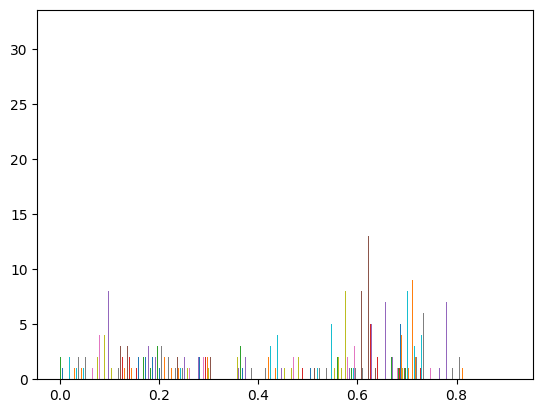

In [74]:
g = grayscale[:, :, 0]
plt.hist(g, bins=256)